In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import stats as st
%matplotlib inline

#### General Functions

In [2]:
def get_percent_of_na(df,num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index,s.values):
        
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent,num,num_of_nulls))
        
    if count !=0:
        print('There are {} columns with NA!'.format(count))
    else:
        print()
        print('There are no columns with NA!')


def get_info(df):
    print('Head:')
    print()
    display(df.head())
    print ('-'*120)
    print('Info:')
    print()
    display(df.info())
    print ('-'*120)
    print('Describe:')
    print()
    display(df.describe())
    print ('-'*120)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    get_percent_of_na(df_megaline_calls,2)
    print ('-'*120)
    print('Shape:')
    print(df.shape)
    print ('-'*120)
    print('Duplicated:')
    print('We have {} duplicated rows!'.format(df.duplicated().sum()))

In [3]:
df_megaline_calls = pd.read_csv('megaline_calls.csv')
df_megaline_internet = pd.read_csv('megaline_internet.csv')
df_megaline_messages = pd.read_csv('megaline_messages.csv')
df_megaline_tariffs = pd.read_csv('megaline_tariffs.csv')
df_megaline_users = pd.read_csv('megaline_users.csv')

# <font color ='green'> Step 1: </font>
## <font color ='green'> Study General Information </font>

#### Studying General Information: <strong> megaline users </strong>

In [4]:
get_info(df_megaline_users)

Head:



,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",12/24/2018,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",8/13/2018,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",10/21/2018,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",1/28/2018,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",5/23/2018,surf,NaN


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   tariff      500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

------------------------------------------------------------------------------------------------------------------------
Describe:



,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


------------------------------------------------------------------------------------------------------------------------


,first_name,last_name,city,reg_date,tariff,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Seymour,Conley,"New York-Newark-Jersey City, NY-NJ-PA MSA",2/6/2018,surf,12/18/2018
freq,3,3,80,5,339,3



Columns with nulls:

There are no columns with NA!
------------------------------------------------------------------------------------------------------------------------
Shape:
(500, 8)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


#### Conclusion:

Studying the general information about users led me to understand a few actions that needs to be done:

- [ ] Check if we have information about all the 500 users in other tables 

#### Studying General Information: <strong> megaline calls </strong>

In [5]:
get_info(df_megaline_calls)

Head:



,id,user_id,call_date,duration
0,1000_93,1000,12/27/2018,8.52
1,1000_145,1000,12/27/2018,13.66
2,1000_247,1000,12/27/2018,14.48
3,1000_309,1000,12/28/2018,5.76
4,1000_380,1000,12/30/2018,4.22


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

------------------------------------------------------------------------------------------------------------------------
Describe:



,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


------------------------------------------------------------------------------------------------------------------------


,id,call_date
count,137735,137735
unique,137735,351
top,1459_163,12/27/2018
freq,1,1091



Columns with nulls:

There are no columns with NA!
------------------------------------------------------------------------------------------------------------------------
Shape:
(137735, 4)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


#### Conclusion:

Studying the general information led me to understand a few actions that needs to be done:

- [ ] id column: can be splitted into the identifier of the call, which can be found after the underscore
- [ ] call_date column: can be split into three columns for later analysis --> day, month, year
- [ ] after splitting the id column can change type of the identifier to int
- [ ] call_date should be date type, not object
- [ ] calls with duration <=0.1 will be classified as missed call, later will drop them
- [ ] calls with high duration can be left untouched since I have no data about what they were talking about
- [ ] Further analysis will be taken

#### Studying General Information: <strong> megaline internet </strong>

In [6]:
get_info(df_megaline_internet)

Head:



,id,user_id,session_date,mb_used
0,1000_13,1000,12/29/2018,89.86
1,1000_204,1000,12/31/2018,0.00
2,1000_379,1000,12/28/2018,660.40
3,1000_413,1000,12/26/2018,270.99
4,1000_442,1000,12/27/2018,880.22


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

------------------------------------------------------------------------------------------------------------------------
Describe:



,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


------------------------------------------------------------------------------------------------------------------------


,id,session_date
count,104825,104825
unique,104825,351
top,1107_54,12/24/2018
freq,1,851



Columns with nulls:

There are no columns with NA!
------------------------------------------------------------------------------------------------------------------------
Shape:
(104825, 4)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


#### Conclusion:

Studying the general information led me to understand a few actions that needs to be done:

- [ ] Same conclusions as previous for id and date
- [ ] Users with 0 mb used is ok, could be on a trip or something and used WiFi instead of regular connection. Although I am gonna check these users with other measures
- [ ] Need to get answer about what does 0 means.
- [ ] Further analysis will be taken

#### Studying General Information: <strong> megaline messages </strong>

In [7]:
get_info(df_megaline_messages)

Head:



,id,user_id,message_date
0,1000_125,1000,12/27/2018
1,1000_160,1000,12/31/2018
2,1000_223,1000,12/31/2018
3,1000_251,1000,12/27/2018
4,1000_255,1000,12/26/2018


------------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

------------------------------------------------------------------------------------------------------------------------
Describe:



,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


------------------------------------------------------------------------------------------------------------------------


,id,message_date
count,76051,76051
unique,76051,351
top,1055_246,12/28/2018
freq,1,702



Columns with nulls:

There are no columns with NA!
------------------------------------------------------------------------------------------------------------------------
Shape:
(76051, 3)
------------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows!


#### Conclusion:

Studying the general information led me to understand a few actions that needs to be done:

- [ ] Same conclusions as previous for id and date
- [ ] Might need to add another column to indicate message for later merge
- [ ] Further analysis will be taken

#### Studying General Information: <strong> megaline tariffs </strong>

In [8]:
df_megaline_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,tariff_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


This table is only for the charges, no need to check all info, just if types are correct.

In [9]:
df_megaline_tariffs.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
tariff_name               object
dtype: object

# <font color ='green'> Step 2: </font>
## <font color ='green'>Prepare data for analysis </font>

In [10]:
#function to extract id from id column --> '1000_93' to '93'
get_id = np.vectorize(lambda x: re.sub('.*_','',x))

def get_info_date(df):
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns  if 'date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['day'] = df[columns[idx]].dt.day_name()
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year
    return df

#### Studying General Information: <strong> megaline users </strong>

In [11]:
df_megaline_users['reg_date'] = pd.to_datetime(df_megaline_users['reg_date'])
df_megaline_users['churn_date'] = pd.to_datetime(df_megaline_users['churn_date'])
#might be useful data for later
df_megaline_users['time_to_leave'] = df_megaline_users['churn_date'] - df_megaline_users['reg_date']

In [12]:
df_megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,tariff,churn_date,time_to_leave
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaT


#### Studying General Information: <strong> megaline calls </strong>

In [13]:
df_megaline_calls['call_date'] = pd.to_datetime(df_megaline_calls['call_date'])
df_megaline_calls['id'] = get_id(df_megaline_calls['id']).astype(int)
df_megaline_calls = get_info_date(df_megaline_calls)
df_megaline_calls['call_classifier'] = np.where(df_megaline_calls['duration'] < 0.1,'Missed call','Authorized call')

In [14]:
df_megaline_calls.head()

,id,user_id,call_date,duration,day,month,year,call_classifier
0,93,1000,2018-12-27,8.52,Thursday,December,2018,Authorized call
1,145,1000,2018-12-27,13.66,Thursday,December,2018,Authorized call
2,247,1000,2018-12-27,14.48,Thursday,December,2018,Authorized call
3,309,1000,2018-12-28,5.76,Friday,December,2018,Authorized call
4,380,1000,2018-12-30,4.22,Sunday,December,2018,Authorized call


#### Studying General Information: <strong> megaline internet </strong>

In [15]:
df_megaline_internet = get_info_date(df_megaline_internet)
df_megaline_internet['id'] = get_id(df_megaline_internet['id'])
df_megaline_internet.head()

,id,user_id,session_date,mb_used,day,month,year
0,13,1000,2018-12-29,89.86,Saturday,December,2018
1,204,1000,2018-12-31,0.00,Monday,December,2018
2,379,1000,2018-12-28,660.40,Friday,December,2018
3,413,1000,2018-12-26,270.99,Wednesday,December,2018
4,442,1000,2018-12-27,880.22,Thursday,December,2018


#### Studying General Information: <strong> megaline messages </strong>

In [16]:
df_megaline_messages['id'] = get_id(df_megaline_messages['id'])
df_megaline_messages = get_info_date(df_megaline_messages)
df_megaline_messages.head()

,id,user_id,message_date,day,month,year
0,125,1000,2018-12-27,Thursday,December,2018
1,160,1000,2018-12-31,Monday,December,2018
2,223,1000,2018-12-31,Monday,December,2018
3,251,1000,2018-12-27,Thursday,December,2018
4,255,1000,2018-12-26,Wednesday,December,2018


# <font color ='green'> Step 2: </font>
## <font color ='green'> Do a little analysis </font>

<strong>For each user need to find:</strong>

<ol>
    <li>Number of calls made and minutes spent per month </li>
    <li>Number of SMS sent per month </li>
    <li>Volume of web traffic per month </li>
    <li>Monthly profit from each of the users </li>
</ol>

<strong>Note: We do not have data for every user per usage. For example for messages we have info only for 402 users out of the 500.</strong>

In [17]:
df_megaline_messages['user_id'].nunique()

402

In [18]:
%%timeit
df_megaline_calls.pivot_table(index='user_id',values='duration',aggfunc=['sum','count'])

17.2 ms ± 375 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [19]:
%%timeit
df_megaline_calls.groupby(['user_id'])['duration'].agg(['sum','count'])

5.9 ms ± 321 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Will be using groupby instead of pivot since it is faster

In [20]:
#1
df_megaline_calls.groupby(['user_id','month']).agg({'duration':'sum','id':'count'}).\
            rename(columns={'duration':'Minutes spent per month','id':'Calls Made'})

Minutes spent per month  Calls Made
user_id month                                         
1000    December                    116.83          16
1001    August                      171.14          27
        December                    392.93          56
        November                    404.59          64
        October                     374.11          65
...                                    ...         ...
1498    September                   344.62          45
1499    December                    468.10          65
        November                    288.56          45
        October                     363.28          53
        September                   330.37          41

[2258 rows x 2 columns]

In [21]:
#2
df_megaline_messages.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'SMS per month'})

SMS per month
user_id month                   
1000    December              11
1001    August                30
        December              44
        November              36
        October               53
...                          ...
1496    December              11
        November              13
        October               18
        September             21
1497    December              50

[1806 rows x 1 columns]

In [22]:
#3
df_megaline_internet.groupby(['user_id','month']).agg({'mb_used':'sum'})\
            .rename(columns={'mb_used':'Traffic used per month in mb'})

Traffic used per month in mb
user_id month                                  
1000    December                        1901.47
1001    August                          6919.15
        December                       19369.18
        November                       18504.30
        October                        22330.49
...                                         ...
1498    September                      22827.28
1499    December                       22059.21
        November                       16813.83
        October                        19492.43
        September                      12984.76

[2277 rows x 1 columns]

In [23]:
#4
#steps for selfcheck to calculate monthly revenue i need:
#1. combine all previous dataframes to one
#2. find per user the package he bought
#3. check for each parameter if they used more than they should and calculate it
#prepare the dataframes
min_spent = df_megaline_calls.groupby(['user_id','month']).agg({'duration':'sum'}).\
            rename(columns={'duration':'Minutes spent per month'})

traffic_used = \
df_megaline_internet.groupby(['user_id','month']).agg({'mb_used':'sum'})\
        .rename(columns={'mb_used':'Traffic used per month in mb'})

sms_used = df_megaline_messages.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'SMS per month'})

user_plan = df_megaline_users[['user_id','tariff']]

In [24]:
#self check to see if its ok. Note: this can be done with merge also but will need to reset_index before
#pd.concat([min_spent,traffic_used,sms_used],axis=1)

In [25]:
df_users_usage = pd.concat([min_spent,traffic_used,sms_used],axis=1).reset_index().merge(user_plan,on='user_id')
#change columns to be more readable and useable for future functions
df_users_usage.columns = ['user_id','month','minutes','traffic','sms','tariff']
df_users_usage.head()

,user_id,month,minutes,traffic,sms,tariff
0,1000,December,116.83,1901.47,11.0,ultimate
1,1001,August,171.14,6919.15,30.0,surf
2,1001,December,392.93,19369.18,44.0,surf
3,1001,November,404.59,18504.30,36.0,surf
4,1001,October,374.11,22330.49,53.0,surf


In [26]:
# Function to calculate if a user exceed the plan usage
def calculate_exceeding(df,df_tariffs):
    if df.isna().sum().sum() !=0:
        df.fillna(0,inplace=True)
    
    exceeding_minutes = []
    exceeding_sms = []
    exceeding_traffic = []
    
    #initialize ultimate variables
    ultimate_message = df_tariffs.query('tariff_name =="ultimate"').loc[:,'messages_included'].values[0]
    ultimate_traffic = df_tariffs.query('tariff_name =="ultimate"').loc[:,'mb_per_month_included'].values[0]
    ultimate_minutes = df_tariffs.query('tariff_name =="ultimate"').loc[:,'minutes_included'].values[0]
    
    #initialize surf variables
    surf_message = df_tariffs.query('tariff_name =="surf"').loc[:,'messages_included'].values[0]
    surf_traffic = df_tariffs.query('tariff_name =="surf"').loc[:,'mb_per_month_included'].values[0]
    surf_minutes = df_tariffs.query('tariff_name =="surf"').loc[:,'minutes_included'].values[0]
    
    #print('surf',surf_message, surf_traffic,surf_minutes  )
    
    for minutes,traffic, sms, tariff in zip(df['minutes'],df['traffic'],df['sms'],df['tariff']):
        if tariff == 'ultimate':
            if minutes <= ultimate_minutes:
                exceeding_minutes.append(0)
            else:
                exceeding_minutes.append(minutes-ultimate_minutes)
                
            if traffic <= ultimate_traffic:
                exceeding_traffic.append(0)
            else:
                exceeding_traffic.append(traffic-ultimate_traffic)
                
            if sms <= ultimate_message:
                exceeding_sms.append(0)
            else:
                exceeding_sms.append(sms-ultimate_message)
                
        else: #surf case 
            if minutes <= surf_minutes:
                exceeding_minutes.append(0)
            else:
                exceeding_minutes.append(minutes-surf_minutes)
                
            if traffic <= surf_traffic:
                exceeding_traffic.append(0)
            else:
                exceeding_traffic.append(traffic-surf_traffic)
                
            if sms <= surf_message:
                exceeding_sms.append(0)
            else:
                exceeding_sms.append(sms-surf_message)
                
    return np.ceil(exceeding_minutes), np.ceil(exceeding_traffic), np.ceil(exceeding_sms)

In [27]:
df_users_usage['exceeding_minutes'],df_users_usage['exceeding_traffic'],df_users_usage['exceeding_sms'] = \
                calculate_exceeding(df_users_usage, df_megaline_tariffs)
df_users_usage.head()

,user_id,month,minutes,traffic,sms,tariff,exceeding_minutes,exceeding_traffic,exceeding_sms
0,1000,December,116.83,1901.47,11.0,ultimate,0.0,0.0,0.0
1,1001,August,171.14,6919.15,30.0,surf,0.0,0.0,0.0
2,1001,December,392.93,19369.18,44.0,surf,0.0,4010.0,0.0
3,1001,November,404.59,18504.30,36.0,surf,0.0,3145.0,0.0
4,1001,October,374.11,22330.49,53.0,surf,0.0,6971.0,3.0


In [28]:
# Function to calculate the revenue
def calc_revenue(df, df_tariffs):
    
    if df.isna().sum().sum() !=0:
        df.fillna(0,inplace=True)
    
    sum_ = []
    user_sum = 0
    
    #initialize ultimate variables
    ultimate_plan = df_tariffs.query('tariff_name =="ultimate"').loc[:,'usd_monthly_pay'].values[0]
    ultimate_message = df_tariffs.query('tariff_name =="ultimate"').loc[:,'usd_per_message'].values[0]
    ultimate_traffic = df_tariffs.query('tariff_name =="ultimate"').loc[:,'usd_per_gb'].values[0]
    ultimate_minutes = df_tariffs.query('tariff_name =="ultimate"').loc[:,'usd_per_minute'].values[0]
    #print('ultimate', ultimate_plan, ultimate_message, ultimate_traffic, ultimate_minutes)
    
    #initialize surf variables
    surf_plan = df_tariffs.query('tariff_name =="surf"').loc[:,'usd_monthly_pay'].values[0]
    surf_message = df_tariffs.query('tariff_name =="surf"').loc[:,'usd_per_message'].values[0]
    surf_traffic = df_tariffs.query('tariff_name =="surf"').loc[:,'usd_per_gb'].values[0]
    surf_minutes = df_tariffs.query('tariff_name =="surf"').loc[:,'usd_per_minute'].values[0]
    
    for minutes,traffic, sms, tariff in zip(df['exceeding_minutes'],df['exceeding_traffic'],df['exceeding_sms'],df['tariff']):
        if tariff == 'ultimate':
            user_sum += ultimate_plan
            user_sum += ultimate_message * sms
            user_sum += ultimate_traffic * (traffic / 1000)
            user_sum += ultimate_minutes * minutes
        else: #surf plan
            user_sum += surf_plan
            user_sum += surf_message * sms
            user_sum += surf_traffic * (traffic / 1000)
            user_sum += surf_minutes * minutes
        sum_.append(user_sum)
        user_sum = 0
    return sum_

In [29]:
df_users_usage['revenue'] = calc_revenue(df_users_usage,df_megaline_tariffs)
df_rev_per_month = df_users_usage[['user_id','month','revenue']]
#And we can see the total income per user per month
df_rev_per_month.head()

,user_id,month,revenue
0,1000,December,70.00
1,1001,August,20.00
2,1001,December,60.10
3,1001,November,51.45
4,1001,October,89.80


In [30]:
#Most profitable user:
df_rev_per_month.iloc[df_rev_per_month['revenue'].idxmax(),:]

user_id        1379
month      December
revenue      594.38
Name: 1755, dtype: object

In [31]:
#Less profitable user:
df_rev_per_month.iloc[df_rev_per_month['revenue'].idxmin(),:]

user_id      1001
month      August
revenue        20
Name: 1, dtype: object

In [32]:
#Total Revenue:
df_rev_per_month['revenue'].sum()

143439.76

# <font color ='green'> Step 3: </font>
## <font color ='green'> Analyse the data </font>

<strong> Mission goal: </strong>
<br>
Describe the clients' behavior.

For the users of each of the plans, find the number of minutes and SMS and the volume of web traffic they require per month.

Calculate the mean, dispersion and standard deviation. Plot histograms. Describe the distributions.

In [33]:
#Creating Hirarchy for later use in plots
month_hierarchy = ["January", "February", "March","April","May","June","July","August","September","October","November","December"]
df_users_usage['month'] = pd.Categorical(df_users_usage['month'], month_hierarchy)
df_users_usage.head()

,user_id,month,minutes,traffic,sms,tariff,exceeding_minutes,exceeding_traffic,exceeding_sms,revenue
0,1000,December,116.83,1901.47,11.0,ultimate,0.0,0.0,0.0,70.00
1,1001,August,171.14,6919.15,30.0,surf,0.0,0.0,0.0,20.00
2,1001,December,392.93,19369.18,44.0,surf,0.0,4010.0,0.0,60.10
3,1001,November,404.59,18504.30,36.0,surf,0.0,3145.0,0.0,51.45
4,1001,October,374.11,22330.49,53.0,surf,0.0,6971.0,3.0,89.80


In [34]:
# For the users of each of the plans, find the number of minutes and SMS and the volume of web traffic they require per month.
group = df_users_usage.groupby(['tariff','month']).agg({'minutes':'sum','sms':'sum','traffic':'sum'})
group

minutes      sms     traffic
tariff   month                                    
surf     January       385.68     21.0     9749.72
         February     2527.66    108.0   109609.59
         March        7152.31    351.0   306945.12
         April       16619.00    870.0   599210.15
         May         29033.10   1849.0  1073099.33
         June        39499.26   2454.0  1484248.33
         July        51367.31   3271.0  2030815.67
         August      62721.48   4662.0  2720843.68
         September   75852.46   5968.0  3218737.67
         October     96149.09   8020.0  4102786.41
         November   113086.75   9165.0  4624009.00
         December   142297.14  12275.0  5766125.26
ultimate January       732.65     62.0    27672.37
         February     2659.03    151.0   119901.66
         March        3428.42    243.0   219858.22
         April        6646.67    463.0   338554.75
         May         11126.28    931.0   482109.99
         June        16441.12   1379.0   720882.29
         July        23822.27   1937.0   964339.92
         August      28206.51   2732.0  1264845.13
         September   35542.71   3259.0  1459408.78
         October     45067.81   4181.0  1866930.66
         November    53400.65   4903.0  2163278.04
         December    65384.90   6796.0  2766801.97

In [35]:
df_users_usage_surf = df_users_usage.query('tariff == "surf"')[['user_id','minutes','traffic','sms']]
df_users_usage_ultimate = df_users_usage.query('tariff == "ultimate"')[['user_id','minutes','traffic','sms']]

In [36]:
df_users_usage_surf.describe()

,user_id,minutes,traffic,sms
count,1573.000000,1573.000000,1573.000000,1573.000000
mean,1242.755245,404.762390,16558.283490,31.159568
std,139.227939,221.664397,8013.513327,33.566717
min,1001.000000,0.000000,0.000000,0.000000
25%,1120.000000,255.470000,11986.520000,3.000000
50%,1245.000000,401.760000,16829.310000,24.000000
75%,1358.000000,543.680000,20999.610000,47.000000
max,1499.000000,1431.220000,70931.590000,266.000000


In [37]:
df_users_usage_ultimate.describe()

,user_id,minutes,traffic,sms
count,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,406.193083,17214.699694,37.551389
std,150.915644,227.246499,7851.897435,34.767179
min,1000.000000,0.000000,0.000000,0.000000
25%,1126.000000,246.290000,12666.955000,7.000000
50%,1241.500000,398.585000,16858.340000,30.000000
75%,1401.000000,532.227500,21014.527500,61.000000
max,1497.000000,1292.090000,46595.330000,166.000000


In [38]:
def plot_hists(df1,df2,column):
    ax = df1.hist(column=column,density=True, bins=30)
    df2.hist(column=column,density=True, bins=30, alpha=0.5,ax =ax)
    plt.legend(['df1','df2'])

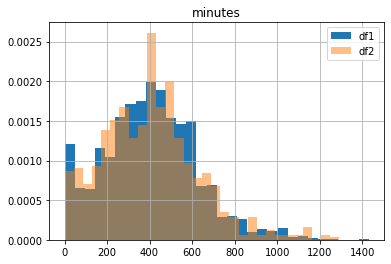

In [39]:
plot_hists(df_users_usage_surf,df_users_usage_ultimate,'minutes' )

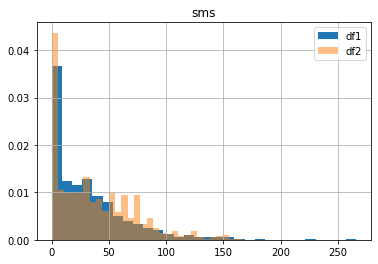

In [40]:
plot_hists(df_users_usage_surf,df_users_usage_ultimate,'sms' )

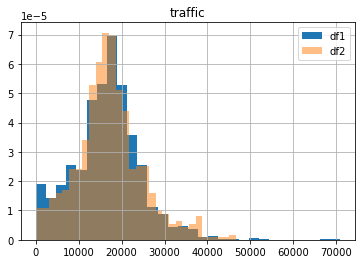

In [41]:
plot_hists(df_users_usage_surf,df_users_usage_ultimate,'traffic' )

In [42]:
min_spent = df_megaline_calls.groupby(['user_id','month']).agg({'duration':'mean'}).\
            rename(columns={'duration':'Minutes spent per month'})

traffic_used = \
df_megaline_internet.groupby(['user_id','month']).agg({'mb_used':'sum'})\
        .rename(columns={'mb_used':'Traffic used per month in mb'})

sms_used = df_megaline_messages.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'SMS per month'})

user_plan = df_megaline_users[['user_id','tariff']]

In [43]:
# Another way to get a small df per plan
#group_surf = df_users_usage.groupby(['tariff','month']).agg({'minutes':'sum','sms':'sum','traffic':'sum'}).xs('surf')
#group_ultimate = df_users_usage.groupby(['tariff','month']).agg({'minutes':'sum','sms':'sum','traffic':'sum'}).xs('ultimate')
#group_surf.agg(['mean','std','var'])

In [44]:
def plot_df(group_df,group, column):
    plt.figure(figsize=(10,5))
    group_df.xs(group[0])[column].plot()
    group_df.xs(group[1])[column].plot()
    plt.legend(['Surf'+ " "+column, 'Ultimate' +" "+column])
    plt.show()

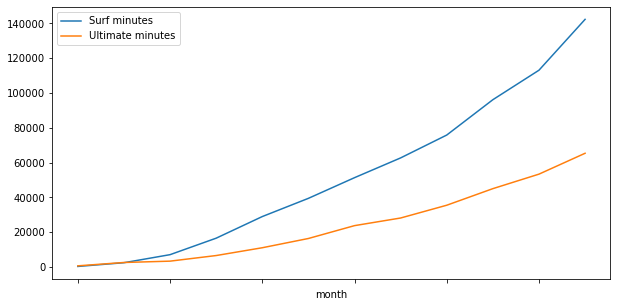

In [45]:
plot_df(group,['surf','ultimate'],'minutes')

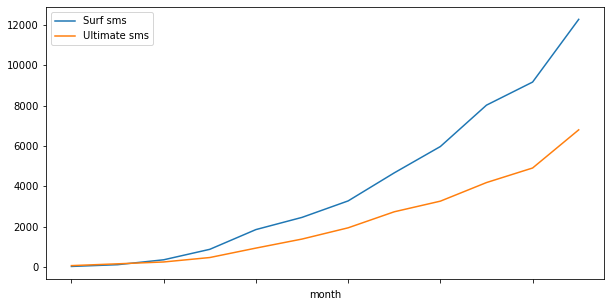

In [46]:
plot_df(group,['surf','ultimate'],'sms')

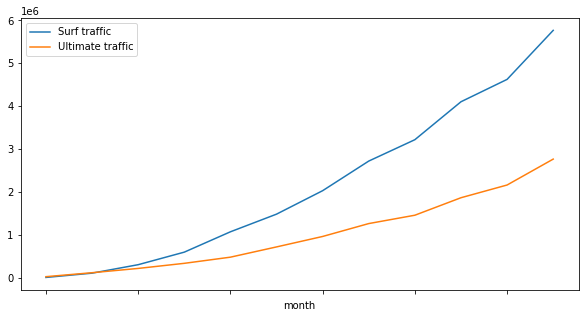

In [47]:
plot_df(group,['surf','ultimate'],'traffic')

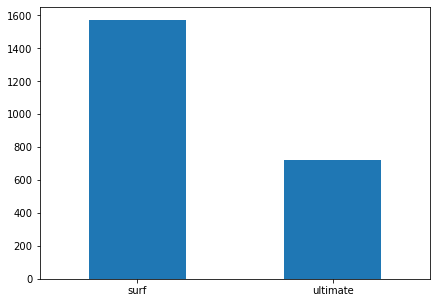

In [48]:
df_users_usage['tariff'].value_counts().plot(kind='bar',rot=0,figsize=(7,5))

<strong>Conclustion:</strong>

From the graphs I can clearly see that users with the surf plan intend to use the services much more than the ultimate users.
Each month the users increase their use of each of the services. But on the other hand when I plotted the histograms and per users of each tarrif we can clearly see that the use of each group is kindly the same. 

<strong> Investigating users mean, median and var: </strong><br>
We can see that for all of our parameters (sms, duration and traffic) they almost share the same mean and median.<br>
Also the histograms shows us that they almost distribute the same, even though we have double surf users.


<strong> Comparing the average use services (per month): </strong><br>
SMS - per surf plan is around 4k, per ultimate is 2.2k<br>
Minutes - per surf plan is around 53k, per ultimate is 24k<br>
Traffic - per surf plan is around 2m mb, per ultimate is 1m

<strong> Comparing the average use services (all togehter per month): </strong><br>
SMS - 3.1k<br>
Minutes - 38k  <br>
Traffic - 1.6m

# <font color ='green'> Step 4: </font>
## <font color ='green'> Test the hypothesis </font>

<strong> Missions: </strong><br>
1. the average profit from the users of Ultimate and Surf calling plans is different
2. the average profit from the users in NY-NJ area is different from that of the users from other regions

In [49]:
#1

In [50]:
#initiazlie parameters
# Null hypothesis = The average profit from surf users is equal to ultimate users (mu_surf == mu_ultimate)
# Alternative Hypothesis = The average profit from surf users is not equal to ultimate users (mu_surf != mu_ultimate)
alpha = 0.05

sample_surf = df_users_usage.groupby(['tariff'])['revenue'].get_group('surf')
sample_ultimate = df_users_usage.groupby(['tariff'])['revenue'].get_group('ultimate')

In [51]:
sample_surf.mean(), sample_ultimate.mean()

(58.156045772409406, 72.16708333333334)

In [52]:
results = st.ttest_ind(
        sample_surf, 
        sample_ultimate,equal_var=False)

#Because we have two tailed I am dividing alpha which means we have 2.5% each side.
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We reject the null hypothesis


In [53]:
#2 - need to filter users from area NY-NJ

In [54]:
ny_nj_users_bool = df_megaline_users['city'].apply(lambda x: True if 'NY-NJ' in x else False)
ny_nj_users = df_megaline_users[ny_nj_users_bool]['user_id'].values.tolist()

In [55]:
#initiazlie parameters
# Null hypothesis = The average profit from NY-NJ users is equal to other region users (mu_NY-NJ == mu_other)
# Alternative Hypothesis = The average profit from NY-NJ users is not equal to other region users (mu_NY-NJ != mu_other)
alpha = 0.05

sample_ny_nj = df_users_usage[df_users_usage['user_id'].isin(ny_nj_users)]['revenue']
sample_other = df_users_usage[~df_users_usage['user_id'].isin(ny_nj_users)]['revenue']

In [56]:
sample_ny_nj.mean(), sample_other.mean()

(57.855456233421776, 63.480299060542755)

Since we rejected the null hypothesis I can conculde that with Confidence level of 0.05 the averange profit of users from NY-NJ area is not equal to the users from other regions therefore users from other region are more profitable!

## <font color ='green'> Overall Conclusion </font>

When studying the general information I found out that we have info about 500 users. 
I had no null values in the data. Rows with 0 call time had no influence on our tests since we studied
the revenue. 

I saw that user 1379 was the most profitable user which spent almost $600 in December, on the other hand
the less profitable user was user 1001 with only $20 (which is the surf plan value). And total revenue was around 
$143k.

I also found out that the users of the surf plan intend to talk each month with mean of 53k minutes and ultimate plan
users intend to talk around 24k minutes.

Surf plan users always used the services far more than the ultimate plan users, which can be seen in the graphs.
Might want to talk with them and upgrade their plan

Testing the hypothesis led me to understand that the average profit from surf plan users is not equal to ultimate,
which can be explained with the usage of the surf plan user was higher than the ultimate which they paid for extra use.

Also, people from the region 'NY-NJ' not profitable over other regions, which I saw testing that hypothesis.